#Import necessary Lib

In [1]:
import sys, shutil
EssCod_PATH='/home/yugang/CHX_Analysis/Eiger4M_Code/EssCode/'
EssCod_PATH in sys.path or sys.path.append(EssCod_PATH)
 

from Get_Data import readframe_series
from Process_Data import average_img, cpdump,cpopen 
from Plot_Data import plot,show_img,show_mask,show_img_with_ROI,pd_data_plot
from XPCS_Functions import make_qlist, calqlist,get_trace_and_maxc
from XPCS_Functions import get_pixellist_intensity,azimuthal_integration
from XPCS_Functions import calqlist_regions, get_waterfall
from XPCS import xpcs

from XSVS import xsvs
from Plot_XSVS import xsvs_plot_histogram


import numpy as np
import matplotlib.pyplot as plt


from Setup_file import *


Sid:  series4M_14_master.h5 is in processing.


In [2]:
%matplotlib notebook
%matplotlib inline

#Sample description

sid = 'series4M_14_master.h5' 
FILENAME = 'coralPor_400Hz_'  
noframes = 3000
exposuretime= 1 ms
acquisition period =2.5 ms

#Load Data, Do average

In [3]:
imgs = readframe_series(sid,inDir)

if T:
    ave = average_img(imgs,0,1500)
    np.save( outDir + 'sid_%s-ave'%sid,ave)
if F:
    ave= np.load(outDir + 'sid_%s-ave.npy'%sid)

In [4]:
imgs

<Frames>
Length: 3000 frames
Frame Shape: 2167 x 2070
Pixel Datatype: uint16

In [5]:
img=ave
img.shape


(2167, 2070)

In [6]:
ave.max()

65535.0

In [7]:
ix = ave.copy()
ix[mask]=0
ix.max()

1.0353333333333334

#Show images, data/mask/ROI

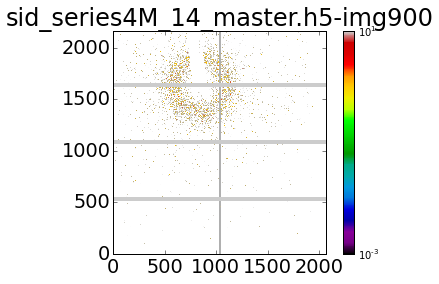

In [8]:
show_img( imgs[900], vmin=0.001,vmax=10,logs=True, set_cb=True,
         xlim=None,ylim=None,title='sid_%s-img900'%sid,
          save=F, outDir=outDir)

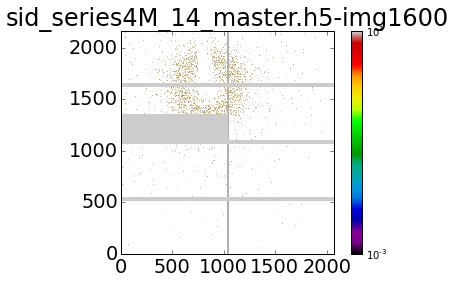

In [9]:
show_img( imgs[1600], vmin=0.001,vmax=10,logs=True, set_cb=True,
         xlim=None,ylim=None,title='sid_%s-img1600'%sid,
          save=F, outDir=outDir)

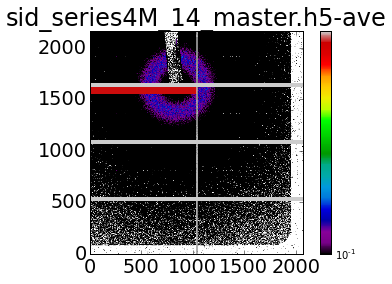

In [10]:
show_img( ave, vmin=0.1,vmax=60,logs=True, set_cb=True,
         xlim=None,ylim=None,title='sid_%s-ave'%sid,
          save=True, outDir=outDir)

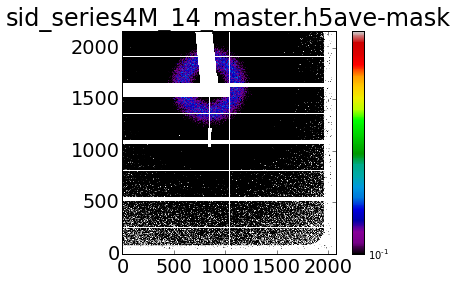

In [11]:
show_mask( img,mask,vmin=0.1,vmax=20,
        logs=True, set_cb=True,
         xlim=None,ylim=None,title='sid_%save-mask'%sid,
          save=True, outDir=outDir)

In [12]:
%run Setup_file.py #if necessary change setup parameter

Sid:  series4M_14_master.h5 is in processing.


In [13]:
%run Setup_file.py #if necessary change setup parameter
dimy,dimx = img.shape
qlist,qradi = make_qlist(qstart,qend,qwidth,noqs)
pixellist,qind,nopr,nopixels = calqlist(qlist,qradi, dimx,dimy,
                        cenx,ceny,qmask=mask); #calculate the pixellist, q_arrays
 

Sid:  series4M_14_master.h5 is in processing.


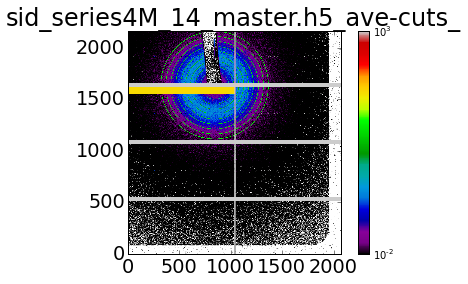

In [14]:

title='sid_%s_ave-cuts_'%sid 
show_img_with_ROI(img, pixellist,qind+0, 0.01,1000,
                  save=True,outDir= outDir,title=title,set_cb=True)

#Plot one ring to check center

average of intensity is:  0.241703869715


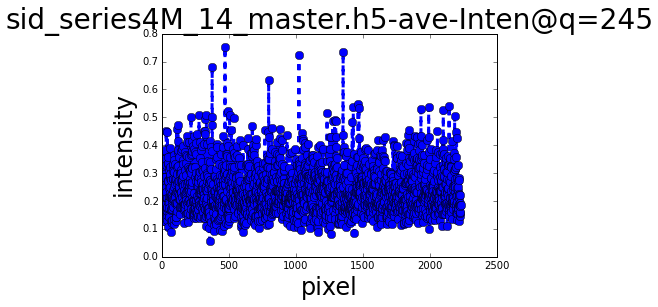

In [15]:
center =  [838.6 , 1634.66]
px, iy = get_pixellist_intensity( img, center, q=245, qwidth=2, qmask=mask)
plot(px,iy,logy=F,title='sid_%s-ave-Inten@q=245'%sid,xlabel='pixel',
         ylabel='intensity',xlim=None,outDir=outDir,save=True)




average of intensity is:  0.0408028673835


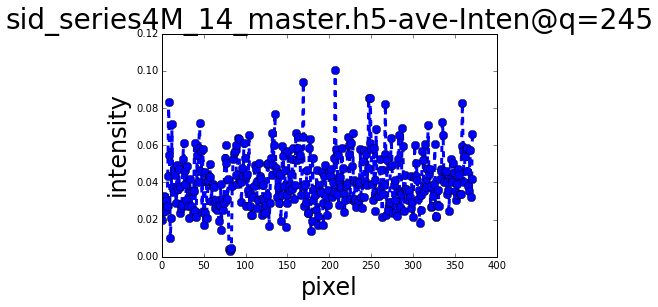

In [16]:
center =  [838.6 , 1634.66]
px, iy = get_pixellist_intensity( img, center, q=120, qwidth=2, qmask=mask)
plot(px,iy,logy=F,title='sid_%s-ave-Inten@q=245'%sid,xlabel='pixel',
         ylabel='intensity',xlim=None,outDir=outDir,save=True)



#Plot q-Iq

In [17]:
if T:
    q,iq=azimuthal_integration( img, qstart=1, qend=1500, qwidth=1,
            cenx=cenx,ceny=ceny, qmask=mask,)
    cpdump([q,iq],'sid_%s-q-iq'%sid,outDir)
else:
    q,iq=cpopen('sid_%s-q-iq'%sid,outDir )

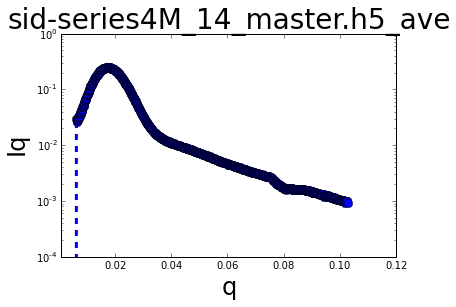

In [18]:
 
plot(q*qperpixel,iq,logy=T,title='sid-%s_ave'%sid,xlabel='q',
         ylabel='Iq',xlim=[0.001,.12],outDir=outDir,save=True)

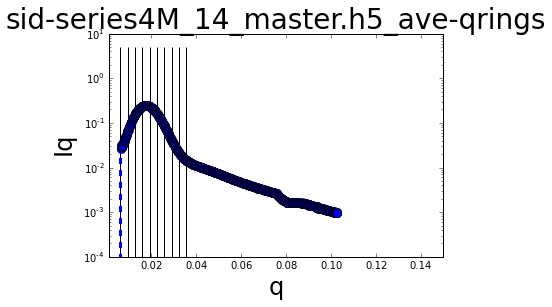

In [19]:
qradi=qradi
fig,ax=plt.subplots()
plot(q*qperpixel,iq,ax=ax,logy=T,title='sid-%s_ave-qrings'%sid,xlabel='q',
     vlines = qradi*qperpixel, hmin=0,hmax=5,
     ylabel='Iq',xlim=[0.001,.15],outDir=outDir,save=True)

#Plot Waterfall for a vert & hort cut

In [20]:

(dimy, dimx,) = img.shape
vert1 = [ 1144,1554,803,804] #horz cut
vert2 = [1554,1555,324,809] #vert cut
#ys,ye,xs,xe = vert
pixellist,qind = calqlist_regions( [ vert1,vert2 ], dimx,dimy,mask)



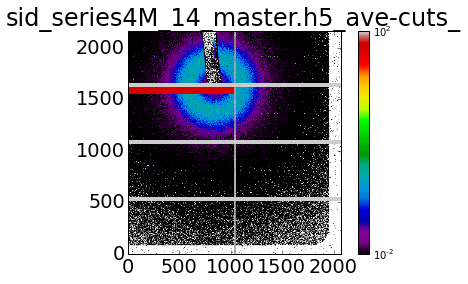

In [21]:
%matplotlib notebook
%matplotlib inline
#%matplotlib qt

title='sid_%s_ave-cuts_'%sid 
show_img_with_ROI(img, pixellist,qind+0, 0.01,100,
                  save=True,outDir= outDir,title=title,set_cb=True)

In [22]:

fs=0
fe=noframes-1
if T:
    wt = get_waterfall(imgs,pixellist,qind, fs, fe, q=None)
    np.save(outDir+'waterfall_cut_horz-vert_1000_frames',wt)
if F:
    wt = np.load( outDir+'waterfall_cut_horz-vert_1000_frames.npy')
    wt = wt.all()
  

In [23]:
wt.keys()

['q0']

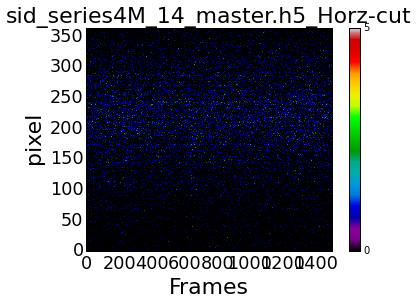

In [24]:
#wt = np.load( outDir+'waterfall_cut_horz-vert_1000_frames.npy')
#wt = wt.all()
direction = 'Horz'
title='sid_%s'%sid + '_%s-cut'%direction
wht = wt['q0'].T
show_img(wht, aspect = 1.1,xticks=True,yticks=True,ylim=None,
         title= title,xlabel = 'Frames', ylabel='pixel',
    extent=None,fontsize=22,save=True,outDir= outDir,set_cb=True)

In [25]:
if F:
    direction = 'Vert'
    title='sid_%s'%sid + '_%s-cut'%direction
    wvt = wt['q1'].T
    show_img(wvt, aspect = 1.1,xticks=True,yticks=True,ylim=None,
             title= title,xlabel = 'Frames', ylabel='pixel',
        extent=None,fontsize=22,save=True,outDir= outDir,set_cb=True)



#Stability of horz and vert cuts

In [26]:
#begframe,noframes = 0,1000
if True:
    trace, maxcts = get_trace_and_maxc(imgs,pixellist,qind,
                begframe,noframes, )
    print ('the max counts are: %s'%maxcts)
    #maxcts = 110
    #np.save(outDir+'trace_Frame-%s-%s'%(begframe,noframes+begframe-1),trace)
    cpdump(trace,'sid_%s-trace_Frame-%s-%s'%(sid,begframe,
                                         noframes+begframe-1),outDir)
else:
    trace = cpopen('sid_%s-trace_Frame-%s-%s'%(sid,begframe, noframes+begframe-1),outDir)

the max counts are: 6


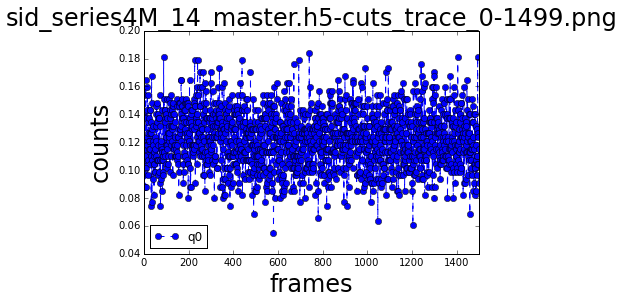

In [27]:
#trace = cpopen('sid_%s-trace_Frame-%s-%s'%(sid,begframe, noframes+begframe-1),outDir)

title = 'sid_%s-cuts_trace_%s-%s.png'%(sid,begframe,noframes+begframe-1)

pd_data_plot( trace, x=None, y=None, title=title,
        xlabel='frames',ylabel='counts',
     logx=False,logy=False,
     save=T,show=True,outDir=outDir, xlim=None,ylim=None)





#Get trace of rings

In [28]:
#begframe,noframes = 0,1000
qlist,qradi = make_qlist(qstart,qend,qwidth,noqs)
pixellist,qind,nopr,nopixels = calqlist(qlist,qradi, dimx,dimy,
                        cenx,ceny,qmask=mask); #calculate the pixellist, q_arrays

if True:
    trace, maxcts = get_trace_and_maxc(imgs,pixellist,qind,
                begframe,noframes, )
    print ('the max counts of rings are: %s'%maxcts)
    #maxcts = 110
    #np.save(outDir+'trace_Frame-%s-%s'%(begframe,noframes+begframe-1),trace)
    cpdump(trace,'sid_%s-Ring_trace_Frame-%s-%s'%(sid,begframe,
                                         noframes+begframe-1),outDir)
    cpdump(maxcts, 'maxcts_sid_%s'%sid)
else:
    trace = cpopen('sid_%s-Ring_trace_Frame-%s-%s'%(sid,begframe, noframes+begframe-1),outDir)

the max counts of rings are: 8


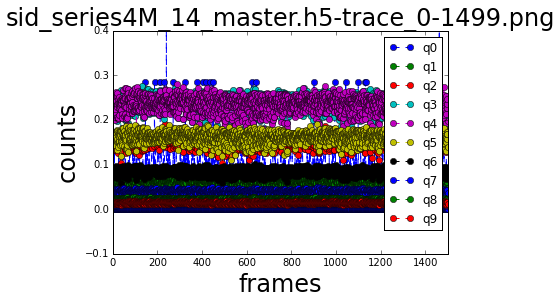

In [29]:
#trace = cpopen('sid_%s-Ring_trace_Frame-%s-%s'%(sid,begframe, noframes+begframe-1),outDir)

title = 'sid_%s-trace_%s-%s.png'%(sid,begframe,noframes+begframe-1)

pd_data_plot( trace, x=None, y=None, title=title,
        xlabel='frames',ylabel='counts',
     logx=False,logy=False,
     save=T,show=True,outDir=outDir, xlim=None,ylim=[-.1,.4])



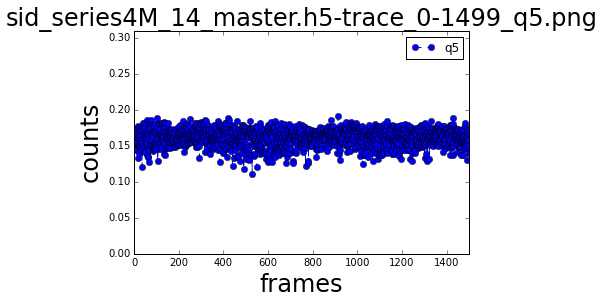

In [30]:
qn =5
title = 'sid_%s-trace_%s-%s_q%s.png'%(sid,begframe,noframes+begframe-1,qn)

pd_data_plot( trace, x=None, y='q%s'%qn, title=title,
        xlabel='frames',ylabel='counts',
     logx=False,logy=False,
     save=T,show=True,outDir=outDir, xlim=None,ylim=[.0,.31])

#One_time correlation

In [31]:
%run Setup_file.py #if necessary change setup parameter


xp = xpcs()
dly = xp.delays( time=  timeperframe )

qstart


Sid:  series4M_14_master.h5 is in processing.


90

In [32]:
print ( 'qlist of q-rings: %s\n' %xp.qlist)
print ( 'q-center (pixel unit) of q-rings: %s\n' %xp.qradi)
print ( 'q-center (real unit) of q-rings: %s\n' % (xp.qradi *qperpixel) )
print ( 'Num pixel in each q-rings: %s\n' %xp.nopr)



qlist of q-rings: [  88.   93.  135.  140.  183.  188.  231.  236.  279.  284.  326.  331.
  374.  379.  422.  427.  470.  475.  518.  523.]

q-center (pixel unit) of q-rings: [  90.          137.77777778  185.55555556  233.33333333  281.11111111
  328.88888889  376.66666667  424.44444444  472.22222222  520.        ]

q-center (real unit) of q-rings: [ 0.00615729  0.00942598  0.01269467  0.01596335  0.01923204  0.02250073
  0.02576941  0.0290381   0.03230679  0.03557547]

Num pixel in each q-rings: [    7  1753  3454  5182  6091  7934  9541 11003 12541 14104]



#Do caclulation of one-time

In [33]:
g2=xp.autocor( print_=F  )
cpdump( g2, 'sid_%s-g2_%sframes'%(FILENAME,noframes),outDir)


Doing g2 caculation of 1500 frames for file--series4M_14_master.h5
##########Total time: 1.81 min


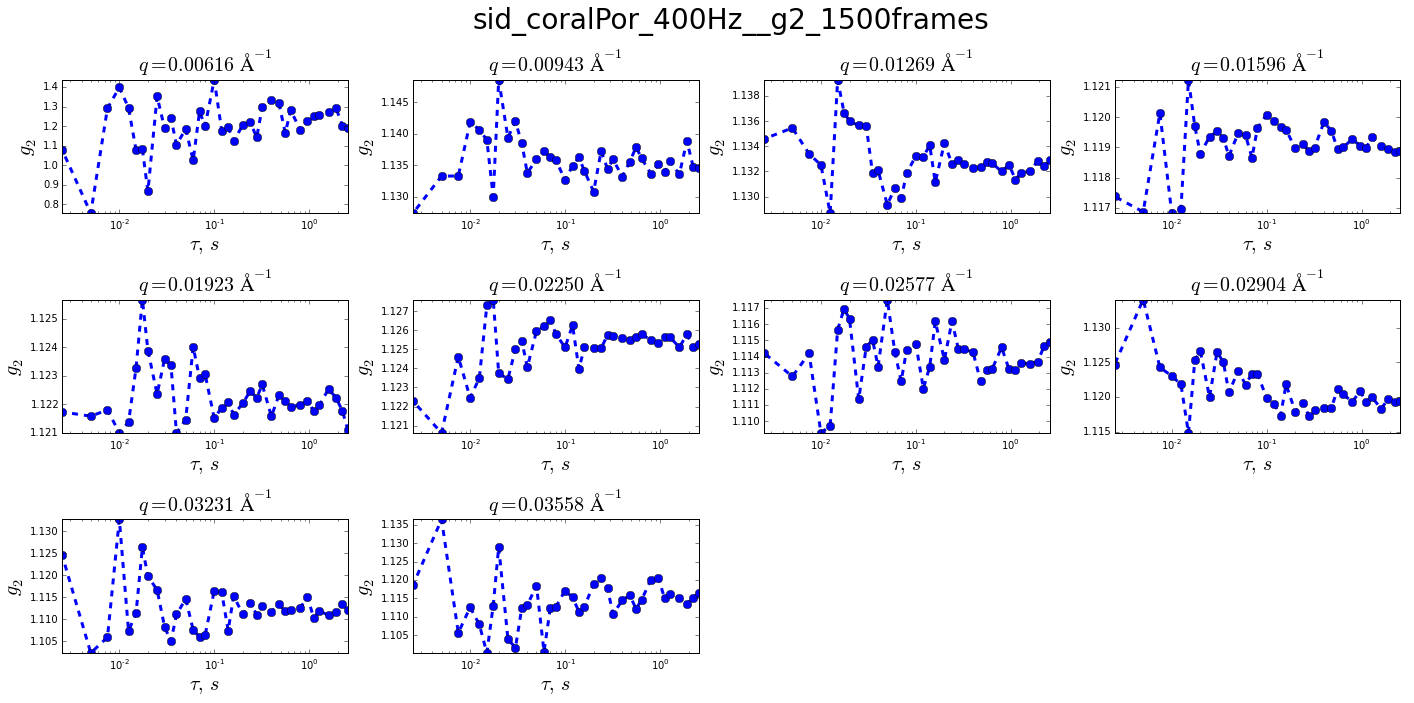

In [34]:
g2 = cpopen('sid_%s-g2_%sframes'%(FILENAME,noframes),outDir)
if np.isnan(g2[0,0]):g2=g2[:,1:]
g2p = xp.g2_to_pds( dly,g2, tscale = 1.0 *10**-3) #tscale=1ms
xp.showg2(g2,show=True,save_=True,
filename='sid_%s_g2_%sframes'%(FILENAME,noframes))

In [35]:
#g2p[1:]

#For XSVS

In [36]:
xs=xsvs()

#Do histogram

In [37]:
print (maxcts)

8


In [38]:
#maxcts = 20  #

if T:
    bins,his, dev = xs.XSVS_Single(sid, expose_time = 0.1, maxcts = maxcts,
                                    do_bining = True,timebin = 2,)
    cpdump([bins,his, dev], 'sid_%s_his_qn%s_qs%s_fra%s'%(
    sid,noqs,qstart,noframes),outDir) 

if F:
    bins,his, dev= cpopen( 'sid_%s_his_qn%s_qs%s_fra%s'%(
        sid,noqs,qstart,noframes),outDir)    
    trace = cpopen('sid_%s-trace_Frame-%s-%s'%(
        sid,fs,fs+nf-1),outDir)

Running sample---series4M_14_master.h5
Doing histrogram for 1500 frames


#For all histrogram-plot

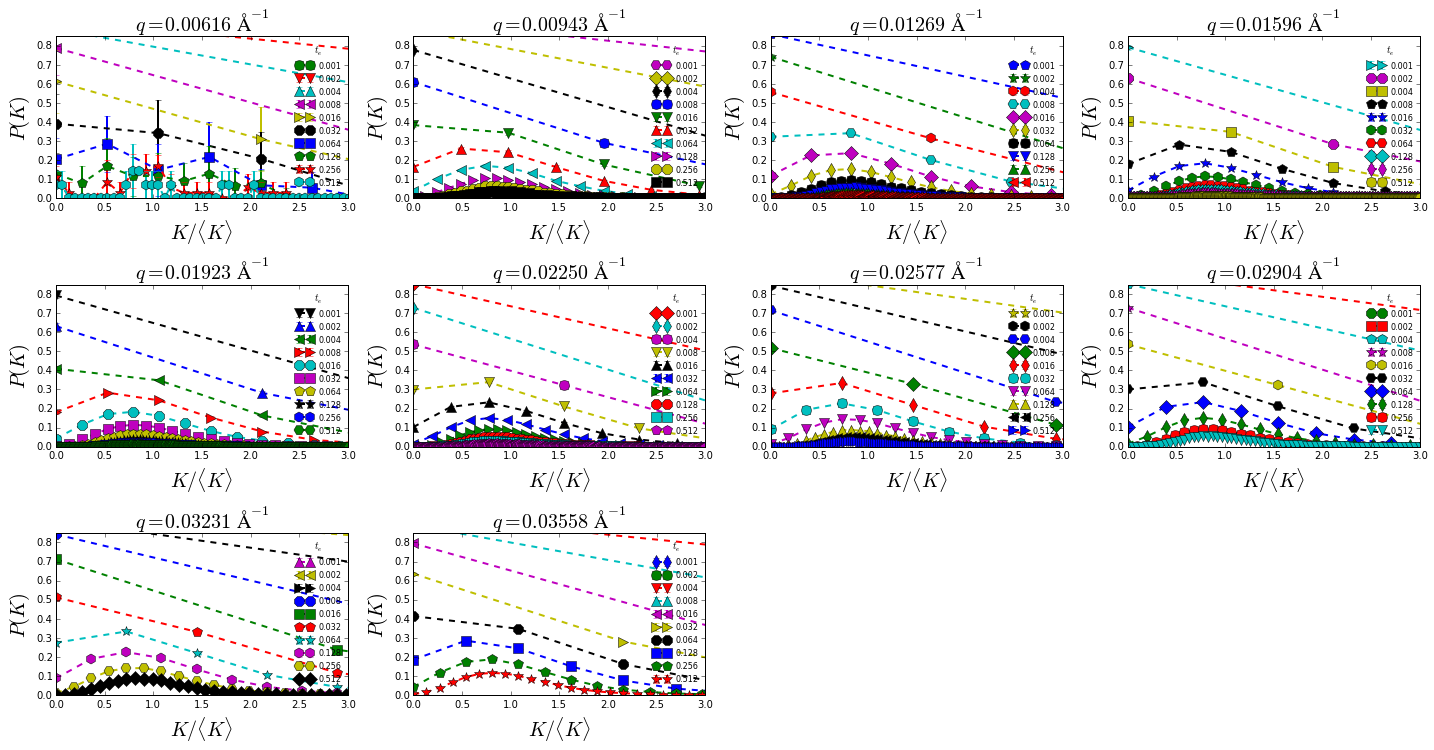

In [53]:
if T:
    trace_mean = trace.mean()
    qradi = xs.qradi
    xsvs_plot_histogram(bins, his, dev, trace_mean,
        model=None,scalex=T,xlim=[0,3],show_dev=True,  expose_time = exposuretime,
        show_poisson=F,show_gamma=F,ylim=[0,.85],qlist=qradi*qperpixel,
    outDir=outDir, output='his_plot_qn%s_qs%s_%s-Frames.png'%(
        noqs,qstart,noframes),plotq= None) #4)

#For one-q histrogram-plot

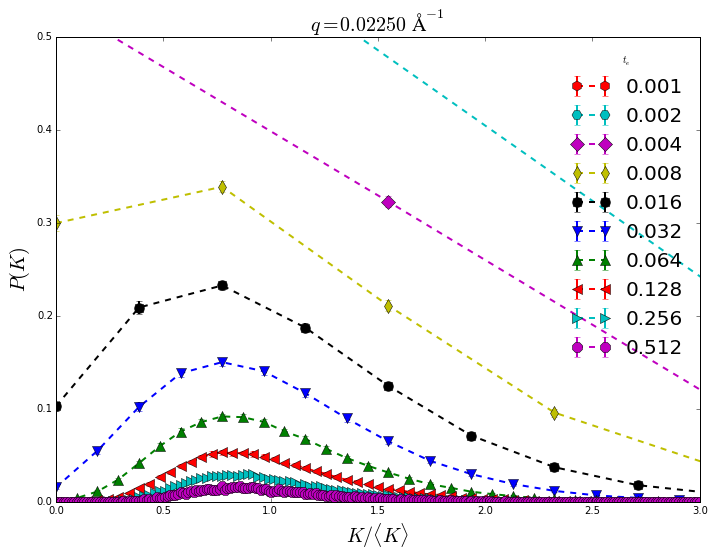

In [40]:
xsvs_plot_histogram(bins, his, dev, trace_mean,
        model=None,scalex=T,xlim=[0,3],show_dev=True,expose_time=exposuretime,
        show_poisson=F,show_gamma=F,ylim=[0,.5],qlist=qradi*qperpixel,
    outDir=outDir, output='his_plot_qn%s_qs%s_%s-Frames.png'%(
        noqs,qstart,noframes),plotq= 5) 

#Do fitting of histrogram

In [41]:
bins,his, dev= cpopen( 'sid_%s_his_qn%s_qs%s_fra%s'%( sid,noqs,qstart,noframes),outDir)    


model=xs.FitVisibility(bins, his, dev, trace_mean,
                fix_K = False,fit_gm=True)
cpdump(model,'sid_hisf-model_qn%s_qs%s_%s-Frames'%(
     noqs,qstart,noframes),outDir)

here!!!
here!!!
here!!!
here!!!
here!!!
here!!!
here!!!
here!!!


#show fit of all-q

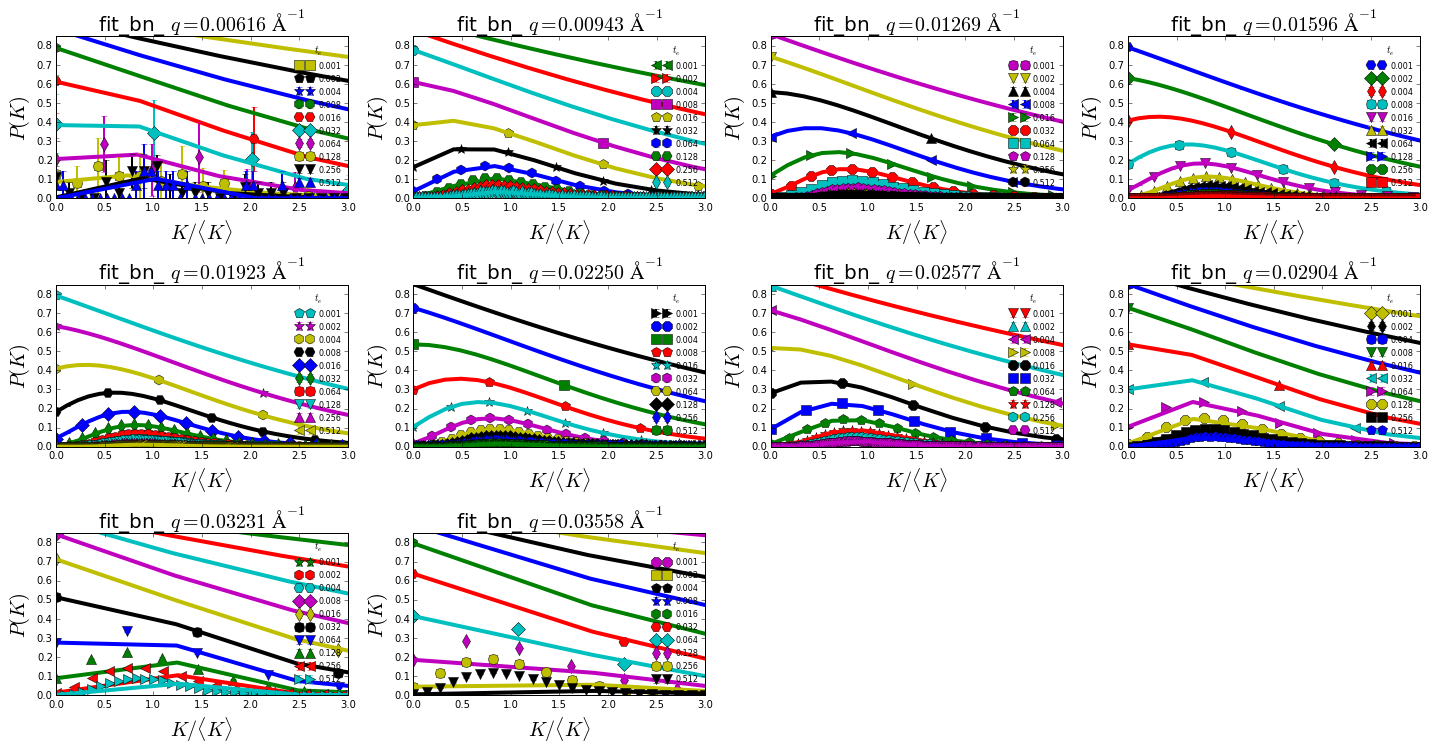

In [42]:
bins,his, dev= cpopen( 'sid_%s_his_qn%s_qs%s_fra%s'%(
    sid,noqs,qstart,noframes),outDir)    
trace = cpopen('sid_%s-Ring_trace_Frame-%s-%s'%(sid,begframe, noframes+begframe-1),outDir)
trace_mean = trace.mean()
qradi = xs.qradi

model= cpopen( 'sid_hisf-model_qn%s_qs%s_%s-Frames'%(
     noqs,qstart,noframes),outDir)

til='data'
til='fit_bn'
#til='fit_pois'
#til='fit_gamma'
#sid=sid.replace('.','')
xsvs_plot_histogram(bins, his, dev, trace_mean, 
    model =model,scalex=True,xlim=[0,3],show_dev=True, expose_time = exposuretime,
    show_bn=T,show_bn_K=F,show_poisson=F,show_gamma=F,
    ylim=[0,.85],qlist=qradi*qperpixel,title='%s_'%til,
outDir=outDir, output='sid_%s_his-%s_Qall-qn%s_qs%s_%s-Frames.png'%(sid,til,
    noqs,qstart,noframes),plotq=None)

#show one-q fit with binomial

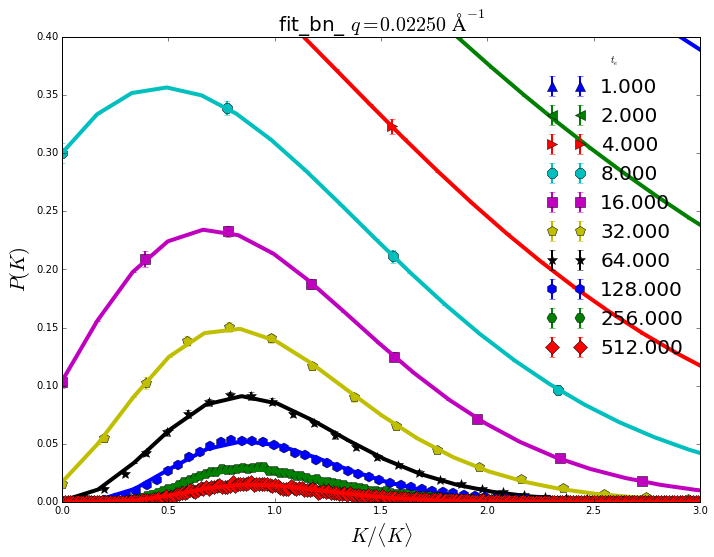

In [43]:
til =  'fit_bn'
    
xsvs_plot_histogram(bins, his, dev, trace_mean,
    model =model,scalex=True,xlim=[0,3],show_dev=True, 
    show_bn=T,show_bn_K=F,show_poisson=F,show_gamma=F,
    ylim=[0,.4],qlist=qradi*qperpixel,title='%s_'%til,
outDir=outDir, output='sid_%s_his-%s_Q5-qn%s_qs%s_%s-Frames.png'%(sid,til,
    noqs,qstart,noframes),plotq=5)

#show one-q fit with binomial/possion

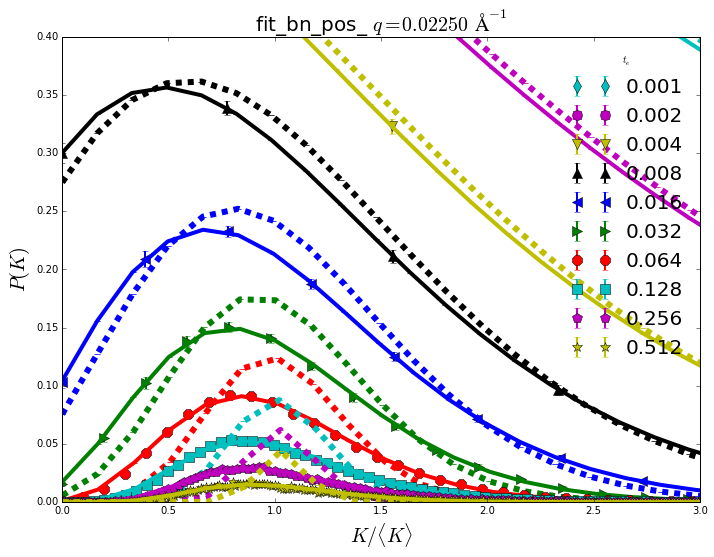

In [44]:
til =  'fit_bn_pos'
    
xsvs_plot_histogram(bins, his, dev, trace_mean,
    model =model,scalex=True,xlim=[0,3],show_dev=True,  expose_time=exposuretime,
    show_bn=T,show_bn_K=F,show_poisson=T,show_gamma=F,
    ylim=[0,0.4],qlist=qradi*qperpixel,title='%s_'%til,
outDir=outDir, output='sid_%s_his-%s_Q5-qn%s_qs%s_%s-Frames.png'%(sid,til,
    noqs,qstart,noframes),plotq=5)

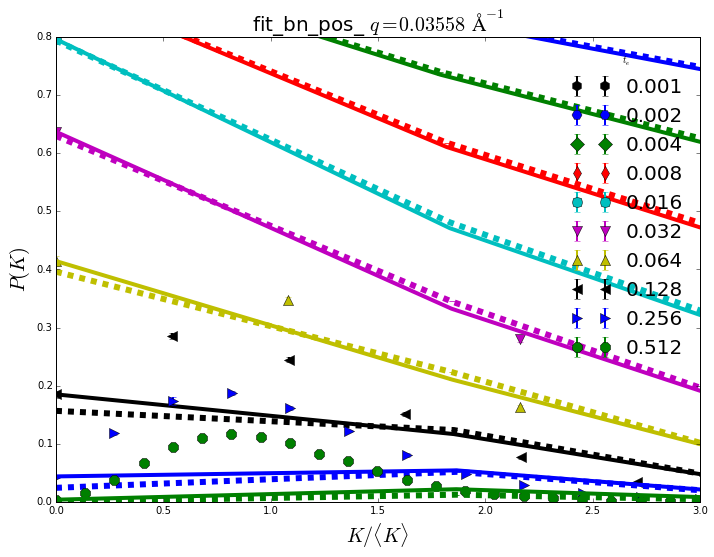

In [45]:
til =  'fit_bn_pos'
    
xsvs_plot_histogram(bins, his, dev, trace_mean,
    model =model,scalex=True,xlim=[0,3],show_dev=True, expose_time=exposuretime,
    show_bn=T,show_bn_K=F,show_poisson=T,show_gamma=F,
    ylim=[0,0.8],qlist=qradi*qperpixel,title='%s_'%til,
outDir=outDir, output='sid_%s_his-%s_Q9-qn%s_qs%s_%s-Frames.png'%(sid,til,
    noqs,qstart,noframes),plotq=9)

#show one-q fit with binomial/gamma

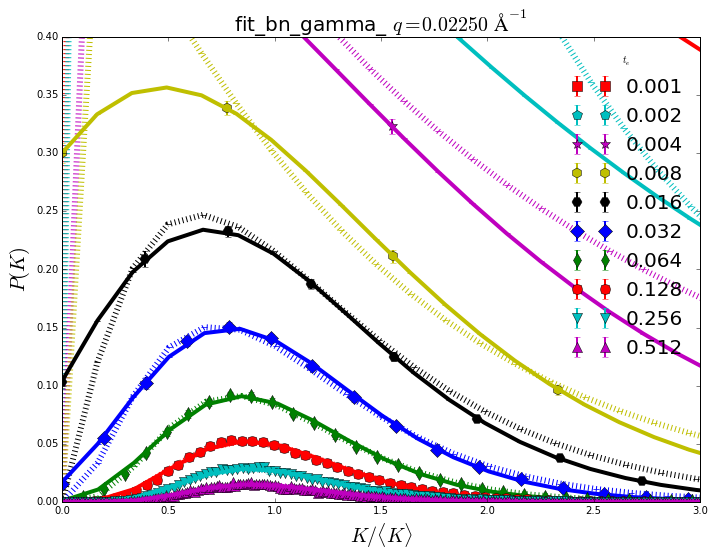

In [46]:
til =  'fit_bn_gamma'
    
xsvs_plot_histogram(bins, his, dev, trace_mean,
    model =model,scalex=True,xlim=[0,3],show_dev=True,   expose_time=exposuretime,
    show_bn=T,show_bn_K=F,show_poisson=F,show_gamma=T,
    ylim=[0,0.4],qlist=qradi*qperpixel,title='%s_'%til,
outDir=outDir, output='sid_%s_his-%s_Q5-qn%s_qs%s_%s-Frames.png'%(sid,til,
    noqs,qstart,noframes),plotq=5)

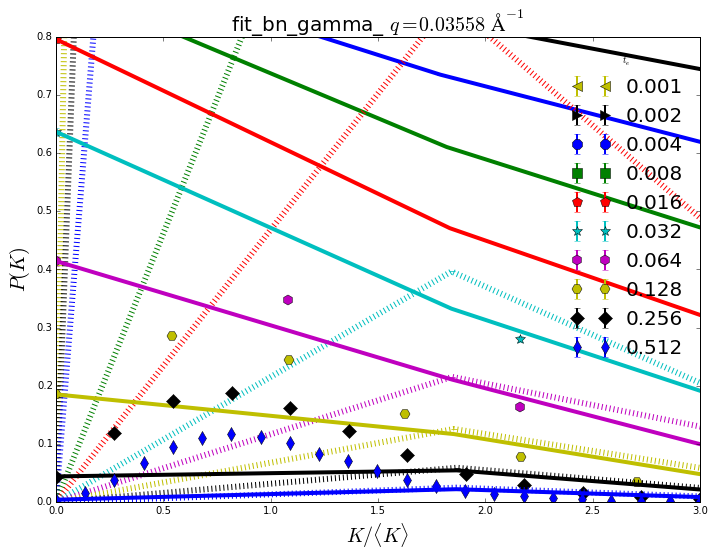

In [47]:
til =  'fit_bn_gamma'
    
xsvs_plot_histogram(bins, his, dev, trace_mean,
    model =model,scalex=True,xlim=[0,3],show_dev=True, expose_time=exposuretime,
    show_bn=T,show_bn_K=F,show_poisson=F,show_gamma=T,
    ylim=[0,.8],qlist=qradi*qperpixel,title='%s_'%til,
outDir=outDir, output='sid_%s_his-%s_Q9-qn%s_qs%s_%s-Frames.png'%(sid,til,
    noqs,qstart,noframes),plotq=9)





#Show beta for all-q

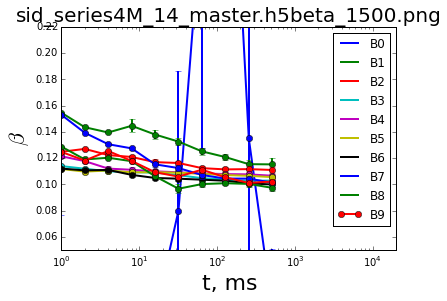

In [48]:
md_q,md_t = xs.model_to_pds(model)

y= ['B%s'%qn for qn in range(noqs)]
yerr= ['Be%s'%qn for qn in range(noqs)]
#yerr=None
#y=['B0','B1']
fig,ax=plt.subplots();
#md_t.plot( ax=ax,marker='o',c='r',ls='-',markersize=6,subplots=F,
    #lw=2,x='x',y=y,yerr=yerr,xlim=[0,2**10],logx=True,ylim=[0,.05],legend=T);
for i in range( len(y)):
    #print y[i]
    md_t.plot( ax=ax,marker='o',c='r',ls='-',markersize=6,subplots=F,
    lw=2,x=md_t['x']*1000,y=y[i],yerr=yerr[i],
        xlim=[0,10**4*2],logx=True,ylim=[0.05,.22],legend=T);

ax.set_xlabel(r't, ms',fontsize=22);ax.set_ylabel(r'$\beta$',fontsize=22);
ax.set_title( 'sid_%sbeta_%s.png'%(sid,noframes), fontsize= 20 )
plt.savefig(outDir+
    'sid_%sbeta_%s.png'%(sid,noframes) )
plt.show()

#Show beta for one-q

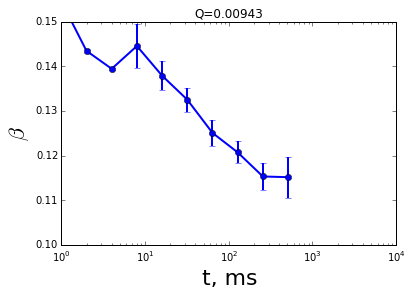

In [49]:
 
qn=1;
qv=qradi*qperpixel

fig,ax=plt.subplots();
md_t.plot( ax=ax,marker='o',c='r',ls='-',markersize=6,
    title='Q=%.5f'%qv[qn],
    lw=2,x=md_t['x']*1000,y='B%s'%qn,yerr='Be%s'%qn,ylim=[0.1,0.15],
          xlim=[0,10**3*10],logx=True,legend=False);
ax.set_xlabel('t, ms',fontsize=22);
ax.set_ylabel(r'$\beta$',fontsize=22);
plt.savefig(outDir+
    'sid_%sbeta_q%.5f_%s.png'%(sid,qv[qn],noframes) )
plt.show()

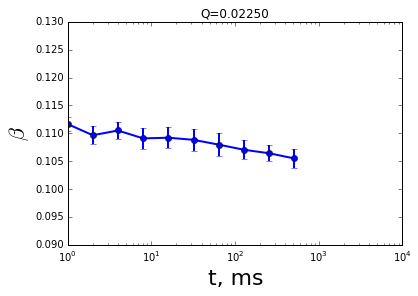

In [55]:
qn=5;
qv=qradi*qperpixel

fig,ax=plt.subplots();
md_t.plot( ax=ax,marker='o',c='r',ls='-',markersize=6,
    title='Q=%.5f'%qv[qn],
    lw=2,x=md_t['x']*1000,y='B%s'%qn,yerr='Be%s'%qn,ylim=[0.09,0.13],
          xlim=[0,10**3*10],logx=True,legend=False);
ax.set_xlabel('t, ms',fontsize=22);
ax.set_ylabel(r'$\beta$',fontsize=22);
plt.savefig(outDir+
    'sid_%sbeta_q%.5f_%s.png'%(sid,qv[qn],noframes) )
plt.show()

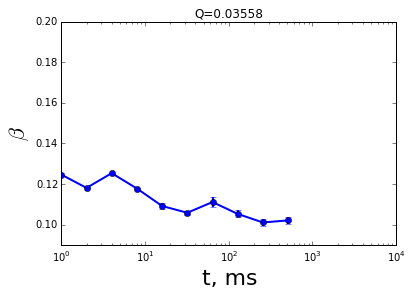

In [51]:
qn=9;
qv=qradi*qperpixel

fig,ax=plt.subplots();
md_t.plot( ax=ax,marker='o',c='r',ls='-',markersize=6,
    title='Q=%.5f'%qv[qn],
    lw=2,x=md_t['x']*1000,y='B%s'%qn,yerr='Be%s'%qn,ylim=[0.09,0.20],
          xlim=[0,10**3*10],logx=True,legend=False);
ax.set_xlabel('t, ms',fontsize=22);
ax.set_ylabel(r'$\beta$',fontsize=22);
plt.savefig(outDir+
    'sid_%sbeta_q%.5f_%s.png'%(sid,qv[qn],noframes) )
plt.show()

In [52]:
#md_t